In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Data source import complete.


# Baise Line

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [3]:
# data path
DATA_PATH = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load data as csv
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Describe (numerical)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Missing values / dtypes
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
print("Unique counts for object columns:")
df.select_dtypes(include='object').nunique()

Unique counts for object columns:


,0
customerID,7043
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [9]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [10]:
# Fix issue: TotalCharges sometimes stored as string with spaces -> convert to numeric
# create numeric version and report how many were coerced to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nTotalCharges NaNs after coercion:", df['TotalCharges'].isna().sum())


TotalCharges NaNs after coercion: 11


In [11]:
# after casting (float)
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [12]:
# Target distribution
print("Churn distribution (counts & %):")
df['Churn'].value_counts()

Churn distribution (counts & %):


,count
Churn,
No,5174
Yes,1869


In [13]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


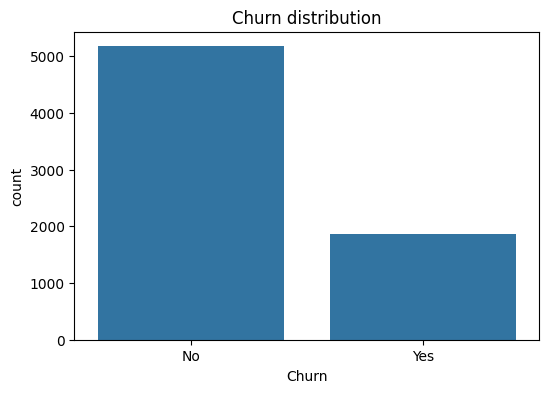

In [14]:
# Quick visualizations (run in notebook)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn distribution')
plt.show()

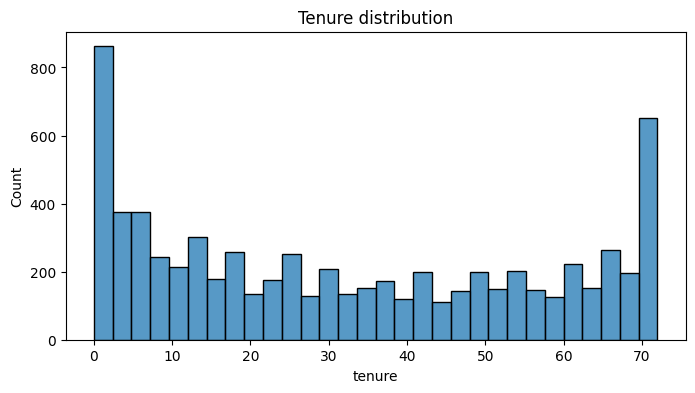

In [15]:
# Tenure histogram
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'].dropna(), bins=30)
plt.title('Tenure distribution')
plt.show()

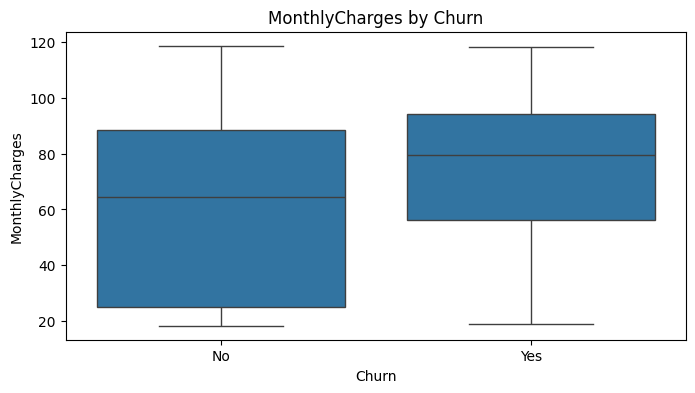

In [16]:
# MonthlyCharges boxplot by churn
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges by Churn')
plt.show()

In [17]:
# Contract type vs churn %
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print("Contract vs Churn (proportions):")
contract_churn

Contract vs Churn (proportions):


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


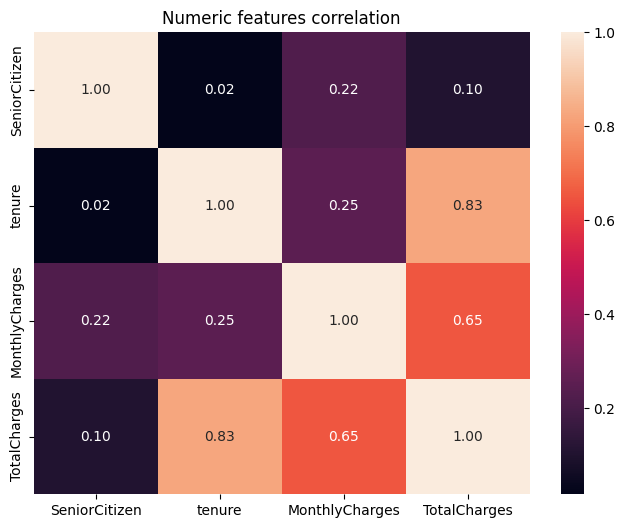

In [18]:
# Quick correlation heatmap for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
    plt.title('Numeric features correlation')
    plt.show()

In [19]:
# Simple baseline model (quick sanity check)
# Prepare features: drop customerID and target, encode simple dummies for categoricals
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

In [20]:
# target binary
df['Churn_binary'] = df['Churn'].map({'Yes':1, 'No':0})
df['Churn_binary']

,Churn_binary
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [21]:
# Fill or drop NaNs for a quick baseline
df_clean = df.copy() # take a copy fro df
df_clean = df_clean.dropna()  # quick approach for baseline only

In [22]:
# One-hot encode categoricals
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()
cat_cols = [c for c in cat_cols if c != 'Churn']  # exclude target
df_model = pd.get_dummies(df_clean.drop(columns=['Churn']), columns=cat_cols, drop_first=True)

In [23]:
df_model

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_binary,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [24]:
X = df_model.drop(columns=['Churn_binary'])
y = df_model['Churn_binary']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3687,0,19,100.00,1888.65,True,True,True,True,False,False,...,False,True,False,True,True,False,False,False,False,False
5553,0,1,55.70,55.70,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
6870,0,49,74.60,3720.35,True,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
1874,0,43,86.45,3574.50,False,True,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
147,0,1,45.65,45.65,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [26]:
# scale numeric cols (simple)
scaler = StandardScaler()
num_feats = X_train.select_dtypes(include=[np.number]).columns
X_train[num_feats] = scaler.fit_transform(X_train[num_feats])
X_test[num_feats] = scaler.transform(X_test[num_feats])

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred[:5]

array([1, 0, 1, 1, 0])

In [30]:
y_proba = lr.predict_proba(X_test)[:,1]
y_proba[:5]

array([0.6006987 , 0.0091068 , 0.51145612, 0.7872777 , 0.11156149])

In [31]:
print("Baseline Logistic Regression report:")
print(classification_report(y_test, y_pred))

Baseline Logistic Regression report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [32]:
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.8403466927186567


# Pipeline

In [33]:
# cleaning_pipeline.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
DATA_PATH = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"


# create a pipline
def load_and_clean_data(path=DATA_PATH):
    df = pd.read_csv(path)

    # Drop customerID (not useful for prediction)
    if 'customerID' in df.columns:
        df = df.drop(columns=['customerID'])

    # Fix TotalCharges
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

    # Encode target
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Feature Engineering
    df['tenure_group'] = pd.cut(
        df['tenure'],
        bins=[0, 12, 24, df['tenure'].max()],
        labels=['0-12', '13-24', '25+']
    )

    # Avg monthly spend (avoid divide by zero)
    df['avg_monthly_spend'] = df['TotalCharges'] / (df['tenure'].replace(0, 1))

    # Count how many services the customer subscribed to
    service_cols = [
        'PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport',
        'StreamingTV','StreamingMovies'
    ]
    df['services_count'] = df[service_cols].apply(lambda x: sum(x=='Yes'), axis=1)

    # Convert tenure_group to string so it gets one-hot encoded
    df['tenure_group'] = df['tenure_group'].astype(str)

    # OneHotEncode ALL categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # Split X, y
    X = df.drop(columns=['Churn'])
    y = df['Churn']

    return X, y


In [35]:
# load the pipeline
X, y = load_and_clean_data()
print(X.dtypes.value_counts())
print(y.dtype)

bool       29
int64       3
float64     3
Name: count, dtype: int64
int64


In [36]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,avg_monthly_spend,services_count,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25+,tenure_group_nan
6661,0,72,53.65,3784.00,52.555556,4,False,True,True,False,...,True,False,True,False,True,False,False,False,True,False
4811,0,4,46.00,193.60,48.400000,1,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2193,0,56,21.20,1238.65,22.118750,1,True,False,True,True,...,False,True,False,True,False,False,True,False,True,False
1904,0,56,94.45,5124.60,91.510714,5,True,False,False,True,...,True,False,False,True,False,True,False,False,True,False
6667,0,9,79.55,723.40,80.377778,2,False,False,False,True,...,True,False,False,True,False,True,False,False,False,False


In [37]:
# Scale numeric features
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=[np.number]).columns

In [38]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Training set:", X_train.shape, "Test set:", X_test.shape)

Training set: (5282, 35) Test set: (1761, 35)


In [39]:
# model_training
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [40]:
# Load data
X, y = load_and_clean_data()

In [41]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [42]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [43]:
# Train & evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append([name, acc, prec, rec, f1, auc])

    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.4f}")
    print('\n*********************\n')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.53      0.59       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761

ROC-AUC: 0.8470

*********************


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.49      0.56       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

ROC-AUC: 0.8270

*********************



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:02:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1294
           1       0.60      0.53      0.56       467

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.77      0.78      0.78      1761

ROC-AUC: 0.8222

*********************

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training fr

In [44]:
# Results summary
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print(">>>>> Model Comparison ")
results_df.sort_values(by="ROC-AUC", ascending=False)


>>>>> Model Comparison 


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.802953,0.658730,0.533191,0.589349,0.846981
3,LightGBM,0.791596,0.637363,0.496788,0.558363,0.833474
1,Random Forest,0.792164,0.640669,0.492505,0.556901,0.827040
2,XGBoost,0.782510,0.602439,0.528908,0.563284,0.822247


* Logistic Regression is winning here (!) with the best ROC-AUC (0.846) and highest accuracy.

* Tree-based models (RF, XGB, LGBM) are slightly behind — likely because:

    * They need hyperparameter tuning (default settings often underperform).

    * Logistic regression + one-hot encoded features fits this dataset really well (since churn is influenced by linear-like relationships such as contract type, tenure, etc.).

# hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [46]:
# ---------- Random Forest ----------
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)

In [48]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc', verbose=1)

In [49]:
print("Best RF Params:", rf_grid.best_params_)
print("Best RF ROC-AUC:", rf_grid.best_score_)

Best RF Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best RF ROC-AUC: 0.8456470293602338


In [50]:
# ---------- XGBoost ----------
xgb_params = {
    'n_estimators': [200, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [51]:
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)

In [52]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:09:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [200, 400],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [53]:
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB ROC-AUC:", xgb_grid.best_score_)

Best XGB Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}
Best XGB ROC-AUC: 0.8481537954542923


In [54]:
# ---------- LightGBM ----------
lgbm_params = {
    'n_estimators': [200, 400],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

In [55]:
lgbm = LGBMClassifier(random_state=42)
lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)


In [56]:
lgbm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 10, 20], 'n_estimators': [200, 400],
                         'num_leaves': [31, 50, 100], 'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [57]:
print("Best LGBM Params:", lgbm_grid.best_params_)
print("Best LGBM ROC-AUC:", lgbm_grid.best_score_)

Best LGBM Params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Best LGBM ROC-AUC: 0.8435994165934858


* Model Comparison

    * Random Forest (RF) → ROC-AUC = 0.8456

    * XGBoost (XGB) → ROC-AUC = 0.8481  `best`

    * LightGBM (LGBM) → ROC-AUC = 0.8436

# Model Explainability

<Figure size 1200x600 with 0 Axes>

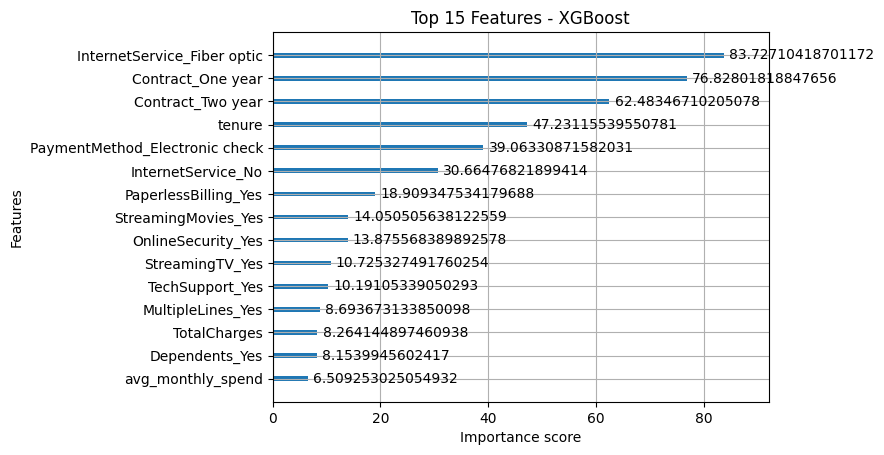

In [58]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Feature importance (XGBoost built-in)
plt.figure(figsize=(12, 6))
plot_importance(xgb_grid.best_estimator_, importance_type='gain', max_num_features=15)
plt.title("Top 15 Features - XGBoost")
plt.show()

# Save the model

In [59]:
import joblib

# Get best model from GridSearchCV
best_xgb = xgb_grid.best_estimator_

# Save model
joblib.dump(best_xgb, "xgb_churn_model.pkl")

['xgb_churn_model.pkl']

In [60]:
# Save it as json
best_xgb.save_model("xgb_model.json")

# Load Model + Predict Function

In [61]:
import joblib
import pandas as pd

# Load model
xgb_model = joblib.load("xgb_churn_model.pkl")

In [62]:
# training_columns = X_train.columns
training_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'avg_monthly_spend', 'services_count', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_13-24', 'tenure_group_25+', 'tenure_group_nan']

In [63]:

def preprocess_input(df):

    # Ensure TotalCharges is numeric
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

    # Create tenure group
    df['tenure_group'] = pd.cut(
        df['tenure'],
        bins=[0, 12, 24, 48, 60, 72],
        labels=['0-12','12-24','24-48','48-60','60-72'],
        right=False
    ).astype(str)

    # Average monthly spend
    df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure'].replace(0, 1)

    # Service count example (depends on your dataset)
    service_cols = ['PhoneService','InternetService','StreamingTV','StreamingMovies']
    df['ServiceCount'] = df[service_cols].apply(lambda x: sum(x=='Yes'), axis=1)

    # One-hot encode all categoricals
    df = pd.get_dummies(df, drop_first=False)

    # Align with training columns
    df = df.reindex(columns=training_columns, fill_value=0)

    return df


In [64]:
# def predict_churn(raw_customer, model=xgb_model):

#     customer_df = pd.DataFrame([raw_customer])
#     processed_df = preprocess_input(customer_df)

#     prob = model.predict_proba(processed_df)[:,1][0]
#     pred = model.predict(processed_df)[0]

#     return {"prediction": int(pred), "probability": float(prob)}

def predict_churn(raw_customer, model=xgb_model, threshold=0.5):

    customer_df = pd.DataFrame([raw_customer])
    processed_df = preprocess_input(customer_df)

    prob = model.predict_proba(processed_df)[:,1][0]
    pred = "Yes" if prob >= threshold else "No"

    return {"prediction": pred, "probability": round(float(prob), 4)}


In [65]:
sample_customer = {
    'tenure': 5,
    'MonthlyCharges': 80,
    'TotalCharges': 400,
    'Contract': 'Month-to-month',
    'InternetService': 'Fiber optic',
    'PhoneService': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check'
}

print(predict_churn(sample_customer))


{'prediction': 'Yes', 'probability': 0.6616}
